In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import os 
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [4]:
data = []
labels = []
classes = 43
cur_path = r"C:\Users\HP\Desktop\numpy"
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

Error loading image
Error loading image
Error loading image
(39206, 30, 30, 3) (39206,)


In [5]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)



(31364, 30, 30, 3) (7842, 30, 30, 3) (31364,) (7842,)


In [6]:
#Building the model

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [7]:
X_train_NEW=np.asarray(X_train)
y_train_NEW= np.asarray(y_train)
X_test_NEW = np.asarray(X_test)
y_test_NEW = np.asarray(y_test)

In [8]:
import sklearn.metrics as metrics

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adamax
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/batchsize-32", histogram_freq=1)
# 
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# model.compile(loss = 'mean_squared_error', optimizer = RMSprop(learning_rate=0.01), metrics = ['accuracy'])
# model.compile(loss = 'mean_squared_error', optimizer = Adam(), metrics = ['accuracy'])

In [9]:
epochs = 12

history = model.fit(X_train, y_train_NEW, batch_size=32, epochs=epochs, validation_data=(X_test, y_test_NEW), callbacks=[tb_callback])
model.save("my_model.h5")

Epoch 1/12
981/981 [==============================] - 84s 83ms/step - loss: 1.9168 - accuracy: 0.5055 - val_loss: 0.4930 - val_accuracy: 0.8746
Epoch 2/12
981/981 [==============================] - 90s 92ms/step - loss: 0.6552 - accuracy: 0.8100 - val_loss: 0.2045 - val_accuracy: 0.9453
Epoch 3/12
981/981 [==============================] - 98s 99ms/step - loss: 0.4332 - accuracy: 0.8739 - val_loss: 0.1287 - val_accuracy: 0.9640
Epoch 4/12
981/981 [==============================] - 91s 92ms/step - loss: 0.3285 - accuracy: 0.9038 - val_loss: 0.1088 - val_accuracy: 0.9716
Epoch 5/12
981/981 [==============================] - 83s 84ms/step - loss: 0.2970 - accuracy: 0.9148 - val_loss: 0.1349 - val_accuracy: 0.9602
Epoch 6/12
981/981 [==============================] - 93s 95ms/step - loss: 0.2479 - accuracy: 0.9283 - val_loss: 0.1216 - val_accuracy: 0.9660
Epoch 7/12
981/981 [==============================] - 79s 81ms/step - loss: 0.2389 - accuracy: 0.9340 - val_loss: 0.0558 - val_accuracy:

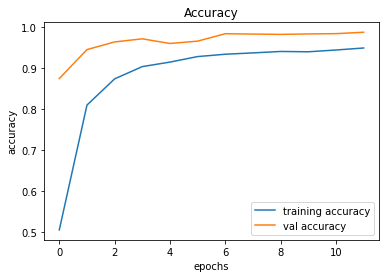

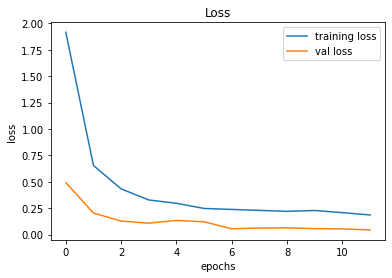

In [10]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

# pred = model.predict_classes(X_test)
predict = model.predict(X_test)
predict=np.argmax(predict,axis=1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, predict))

model.save('traffic_classifier.h5')


0.9441805225653207


In [2]:
%load_ext tensorboard
%tensorboard --logdir logs/


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 15792), started 0:00:16 ago. (Use '!kill 15792' to kill it.)